<a href="https://colab.research.google.com/github/rbbh/ARIMA-playground/blob/master/ARIMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [55]:
pip install pmdarima

In [0]:
import pmdarima as pm
from pmdarima.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

In [84]:
from google.colab import files
uploaded = files.upload()

Saving carsales.txt to carsales.txt


In [0]:
import io
import pandas as pd

# Un-comment the line for the data base that
# you want to predict

#data = pd.read_csv(io.BytesIO(uploaded['airlines2.txt']))
#data = pd.read_csv(io.BytesIO(uploaded['DadosONS.txt']))
data = pd.read_csv(io.BytesIO(uploaded['carsales.txt']))
#data = pd.read_csv(io.BytesIO(uploaded['coloradoRiver.txt']))
#data = pd.read_csv(io.BytesIO(uploaded['accidentalDeathUSA.txt']))
#data = pd.read_csv(io.BytesIO(uploaded['electric.txt']))
#data = pd.read_csv(io.BytesIO(uploaded['gas.txt']))
#data = pd.read_csv(io.BytesIO(uploaded['lakeerie.txt']))
#data = pd.read_csv(io.BytesIO(uploaded['milk.txt']))
#data = pd.read_csv(io.BytesIO(uploaded['redwine.txt']))

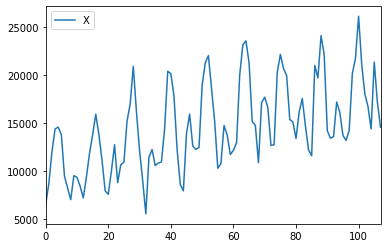

In [86]:
data.plot()

In [0]:
data_n = data.copy()
data_n = data_n/data_n.max()

In [88]:
len(data)

108

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/pmdarima/arima/_auto_solvers.py:360: ModelFitWarning: Unable to fit ARIMA for order=(0, 0, 1) seasonal_order=(0, 1, 2, 12); data is likely non-stationary. (if you do not want to see these warnings, run with error_action="ignore")
  ModelFitWarning)
/usr/local/lib/python3.6/dist-packages/pmdarima/arima/_auto_solvers.py:360: ModelFitWarning: Unable to fit ARIMA for order=(0, 0, 1) seasonal_order=(1, 1, 2, 12); data is likely non-stationary. (if you do not want to see these warnings, run with error_action="ignore")
  ModelFitWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/pyt

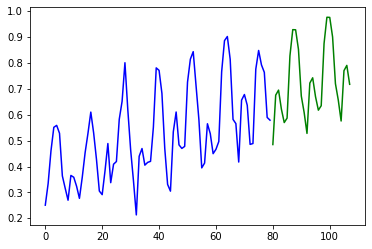

In [89]:
# Load/split the data
train, test = train_test_split(data_n, train_size=80)

# Fit the model
model = pm.auto_arima(train, seasonal=True, m=12)

# Make the forecasts
forecasts = model.predict(test.shape[0])  # predict N steps into the future

# Visualize the forecasts (blue=train, green=forecasts)
x = np.arange(data_n.shape[0])
plt.plot(x[:80], train, c='blue')
plt.plot(x[80:], forecasts, c='green')
plt.show()

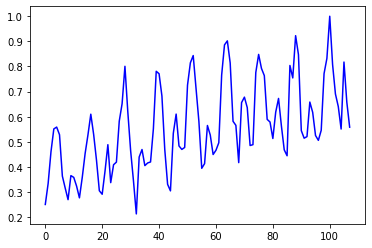

In [90]:
x = np.arange(data.shape[0])
plt.plot(x, data_n, c='blue')
plt.show()

In [0]:
from sklearn.metrics import mean_squared_error

In [92]:
mse = mean_squared_error(forecasts, test)
print(mse)

0.008659270954692632


In [0]:
# Extra packages for if the traditional prediction
# method doesn't work

from pmdarima.pipeline import Pipeline
from pmdarima.preprocessing import BoxCoxEndogTransformer
import pickle

In [94]:
# Define and fit the pipeline
pipeline = Pipeline([
    ('boxcox', BoxCoxEndogTransformer(lmbda2=1e-6)),  # lmbda2 avoids negative values
    ('arima', pm.AutoARIMA(seasonal=True, m=12,
                           suppress_warnings=True,
                           trace=True))
])

pipeline.fit(train)

Fit ARIMA: order=(2, 0, 2) seasonal_order=(1, 1, 1, 12); AIC=-120.658, BIC=-102.902, Fit time=2.625 seconds
Fit ARIMA: order=(0, 0, 0) seasonal_order=(0, 1, 0, 12); AIC=-106.867, BIC=-102.428, Fit time=0.057 seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(1, 1, 0, 12); AIC=-117.585, BIC=-108.707, Fit time=0.642 seconds
Fit ARIMA: order=(0, 0, 1) seasonal_order=(0, 1, 1, 12); AIC=-122.774, BIC=-113.896, Fit time=0.807 seconds
Near non-invertible roots for order (0, 0, 1)(0, 1, 1, 12); setting score to inf (at least one inverse root too close to the border of the unit circle: 0.993)
Fit ARIMA: order=(0, 0, 0) seasonal_order=(0, 1, 0, 12); AIC=-82.035, BIC=-79.816, Fit time=0.036 seconds
Fit ARIMA: order=(2, 0, 2) seasonal_order=(0, 1, 1, 12); AIC=-120.392, BIC=-104.855, Fit time=2.032 seconds
Fit ARIMA: order=(2, 0, 2) seasonal_order=(1, 1, 0, 12); AIC=-115.675, BIC=-100.138, Fit time=1.580 seconds
Fit ARIMA: order=(2, 0, 2) seasonal_order=(2, 1, 1, 12); AIC=-118.503, BIC=-98.528, Fit

/usr/local/lib/python3.6/dist-packages/pmdarima/arima/_auto_solvers.py:360: ModelFitWarning: Unable to fit ARIMA for order=(2, 0, 2) seasonal_order=(1, 1, 2, 12); data is likely non-stationary. (if you do not want to see these warnings, run with error_action="ignore")
  ModelFitWarning)


Fit ARIMA: order=(2, 0, 2) seasonal_order=(0, 1, 0, 12); AIC=-111.058, BIC=-97.741, Fit time=0.634 seconds
Fit ARIMA: order=(2, 0, 2) seasonal_order=(0, 1, 2, 12); AIC=nan, BIC=nan, Fit time=nan seconds


/usr/local/lib/python3.6/dist-packages/pmdarima/arima/_auto_solvers.py:360: ModelFitWarning: Unable to fit ARIMA for order=(2, 0, 2) seasonal_order=(0, 1, 2, 12); data is likely non-stationary. (if you do not want to see these warnings, run with error_action="ignore")
  ModelFitWarning)


Fit ARIMA: order=(2, 0, 2) seasonal_order=(2, 1, 0, 12); AIC=-116.674, BIC=-98.918, Fit time=4.503 seconds
Fit ARIMA: order=(2, 0, 2) seasonal_order=(2, 1, 2, 12); AIC=nan, BIC=nan, Fit time=nan seconds


/usr/local/lib/python3.6/dist-packages/pmdarima/arima/_auto_solvers.py:360: ModelFitWarning: Unable to fit ARIMA for order=(2, 0, 2) seasonal_order=(2, 1, 2, 12); data is likely non-stationary. (if you do not want to see these warnings, run with error_action="ignore")
  ModelFitWarning)


Fit ARIMA: order=(1, 0, 2) seasonal_order=(1, 1, 1, 12); AIC=-121.889, BIC=-106.353, Fit time=2.294 seconds
Near non-invertible roots for order (1, 0, 2)(1, 1, 1, 12); setting score to inf (at least one inverse root too close to the border of the unit circle: 0.998)
Fit ARIMA: order=(2, 0, 1) seasonal_order=(1, 1, 1, 12); AIC=-122.675, BIC=-107.138, Fit time=2.047 seconds
Near non-invertible roots for order (2, 0, 1)(1, 1, 1, 12); setting score to inf (at least one inverse root too close to the border of the unit circle: 0.997)
Fit ARIMA: order=(3, 0, 2) seasonal_order=(1, 1, 1, 12); AIC=-118.541, BIC=-98.566, Fit time=2.698 seconds
Near non-invertible roots for order (3, 0, 2)(1, 1, 1, 12); setting score to inf (at least one inverse root too close to the border of the unit circle: 0.993)
Fit ARIMA: order=(2, 0, 3) seasonal_order=(1, 1, 1, 12); AIC=-118.248, BIC=-98.272, Fit time=2.520 seconds
Near non-invertible roots for order (2, 0, 3)(1, 1, 1, 12); setting score to inf (at least on

Pipeline(steps=[('boxcox',
                 BoxCoxEndogTransformer(floor=1e-16, lmbda=None, lmbda2=1e-06,
                                        neg_action='raise')),
                ('arima',
                 AutoARIMA(D=None, alpha=0.05, d=None, error_action='warn',
                           information_criterion='aic', m=12, max_D=1, max_P=2,
                           max_Q=2, max_d=2, max_order=5, max_p=5, max_q=5,
                           maxiter=50, method='lbfgs', n_fits=10, n_jobs=1,
                           offset_test_args=None, out_of_sample_size=0,
                           random=False, random_state=None, scoring='mse',
                           scoring_args=None, seasonal=True,
                           seasonal_test='ocsb', seasonal_test_args=None,
                           start_P=1, start_Q=1, start_p=2, start_params=None, ...))])

In [0]:
# Serializing the model:
with open('model.pkl', 'wb') as pkl:
    pickle.dump(pipeline, pkl)

In [96]:
# Loading it and making predictions seamlessly:
with open('model.pkl', 'rb') as pkl:
    mod = pickle.load(pkl)
    forecasts = mod.predict(28)
    print(forecasts)

[0.45562909 0.66657006 0.70610995 0.59910813 0.5709692  0.6177748
 0.85700924 0.99332362 1.03431993 0.92208319 0.70639303 0.58147487
 0.49347255 0.72718581 0.76933381 0.65517637 0.62510082 0.67511439
 0.92985326 1.07447527 1.11790943 0.99893377 0.76963542 0.63633243
 0.54213301 0.79178393 0.83664893 0.71503302]


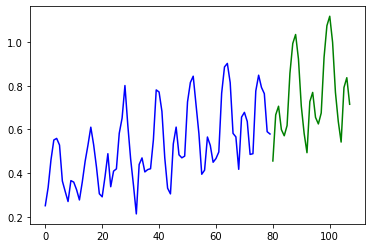

In [98]:
x = np.arange(data_n.shape[0])
plt.plot(x[:80], train, c='blue')
plt.plot(x[80:], forecasts, c='green')
plt.show()

In [99]:
mse = mean_squared_error(forecasts, test)
print(mse)

0.015372486144233598
